## 1. 라이브러리 불러오기
딥러닝 전처리를 위한 torch, plt. torchvision을 불러옵니다.

In [5]:
import torch
import matplotlib.pyplot as plt

In [6]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

## 2. 전처리 종류
- **1. 기본 전처리** `ToTensor()` MNIST는 PIL 이미지로 불러와지기 때문에 텐서로 바꾸려면 **필수**적인 작업
- **2. 정규화** `Normalize(mean, std)`픽셀 값 범위를 [-1, 1]로 정규화 (MNIST 평균 0.1307, 표준편차 0.3081)
- **3. 크기 조정** `Resize()`이미지 크기를 28x28이 아닌 다른 크기로 바꾸고 싶을 때
- **4. 데이터 증강(학습에만 적용)**
    * `RandomRotation(degrees=15)` 이미지를 무작위로 회전
    * `RandomAffine(degrees, translate)` 이동, 확대, 회전
    * `RandomCrop(size, padding=4)` 무작위로 잘라내기
    * `ColorJitter()` MNIST엔 잘 안쓰이지만 RGB 이미지에 유용

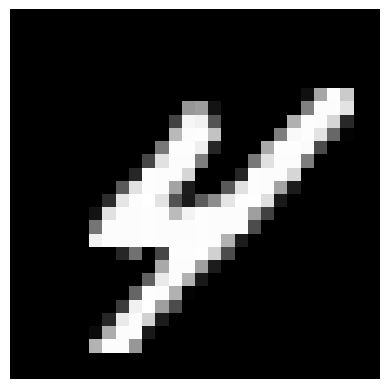

In [16]:
transform = transforms.ToTensor()

# 데이터셋 다운로드 및 전처리 적용
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 데이터 로더 구성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 전처리 후 이미지 확인
def show_tensor_image(tensor_img):
    img = tensor_img.clone()
    img = img * 0.3081 + 0.1307  # 정규화 복원
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

# 한 배치에서 첫 이미지 보기
data_iter = iter(train_loader)
images, labels = next(data_iter)
show_tensor_image(images[0])

- **5. Compose로 전처리 묶기**(머신러닝 Scikit-learn의 **Pipeline**과 비슷한 역할)
  

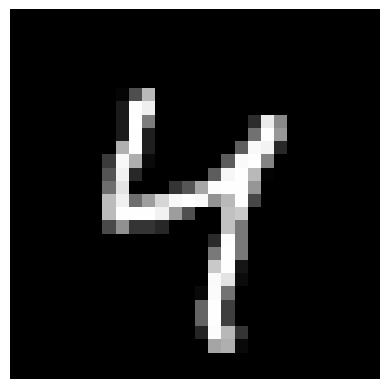

In [15]:
# 훈련용 전처리 구성
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
# 테스트용 전처리 구성 (테스트용은 최소한의 전처리만 거친다.)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 데이터셋 다운로드 및 전처리 적용
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=train_transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=test_transform)

# DataLoader 구성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 전처리 후 이미지 확인 (정규화 되므로 다시 되돌려서 보여줌)
def show_tensor_image(tensor_img):
    img = tensor_img.clone()
    img = img * 0.3081 + 0.1307  # 정규화 복원
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

# 한 배치에서 첫 이미지 보기
data_iter = iter(train_loader)
images, labels = next(data_iter)
show_tensor_image(images[0])